WORLD HAPPINESS REPORT- Analiz

Bu çalışmada World Happiness Report veri setini kullanarak ülkelerin mutluluk düzeyleri ve bu mutluluk düzeyleri üzerindeki etkiler incelenmiştir.İlk olarak veri seti incelenmiş ve veri setindeki eksikliklere göre işlemler uygulanmıştır.



In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024/WHR2024.csv


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [33]:

df = pd.read_csv("/kaggle/input/world-happiness-report-2024/WHR2024.csv")


Veri Setinin Genel Yapısının İncelenmesi

İlk aşamada veri setimizin genel yapısını inceleyeceğiz 

In [34]:
df.head(5)



,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


Veri tablosundaki başlıkları inceleyelim

Country name : Ülke ismi

Ladder score : Merdiven puanı

upperwhisker : Üst bıyık

lowerwhisker : Alt bıyık

Log GPD per capita : Kişi başına düşen katma değer

Social support : Sosyal destek

Healthy life expectancy : Sağlıklı yaşam beklentisi

Freedom to make life choices : Yaşam tercihleri yapma özgürlüğü

Generosity : Cömertlik

Perceptions of corruption : Yolsuzluk algıları

Dystopia + residual : Ölçülemeyen etkiler



Analizin bir sonraki kısmında info() fonksiyonu kullanılarak veri setinin genel yapısı,satır sütun ismi ve veri setindeki eksiklikler incelenmiştir

In [35]:
df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

Gördüğümüz gibi 143 ülke ve 11 satır var. 143 ülkenin 140'ının verilerinin eksiksiz olarak girildiğini görüyoruz. Bu 3 ülkenin en az 1 tane verisinin eksik olduğunu söylüyor. Analizimizde tutarlı olmak için bu 3 ülkeyi listemizden çıkaracağız.

In [36]:
df_clean = df.dropna()


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                140 non-null    object 
 1   Ladder score                                140 non-null    float64
 2   upperwhisker                                140 non-null    float64
 3   lowerwhisker                                140 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + residual

Veri setimizde eksik olup olmadığından emin olmak için aşağıdaki fonksiyonu kullanacağız.

In [38]:
df_clean.isnull().sum()

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

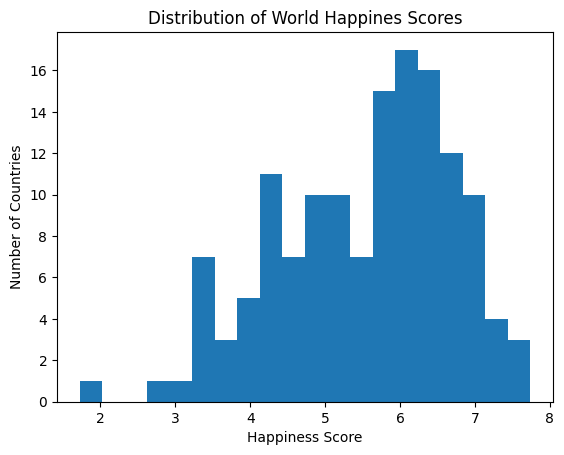

In [39]:
plt.figure()
plt.hist(df_clean["Ladder score"], bins=20)
plt.xlabel("Happiness Score")
plt.ylabel("Number of Countries")
plt.title("Distribution of World Happines Scores")
plt.show()

In [40]:
top_10 = df_clean.sort_values("Ladder score", ascending=False).head(10)
bottom_10 = df_clean.sort_values("Ladder score", ascending=True).head(10)

Yukarıdaki analizimizde mutluluk oranının yüksek olduğu ülkeler daha yoğun fakat  aşırı uçlarda velirgin bir yoğunluk yok.Bu durum sonucunda mutluluk oranının belirli bir oranda daha yoğun olduğunu söyleyebiliriz.

Analizimizin bir sonraki kısmında en mutlu ve en mutsuz 10 ülkeyi inceleyeceğiz.

<function matplotlib.pyplot.show(close=None, block=None)>

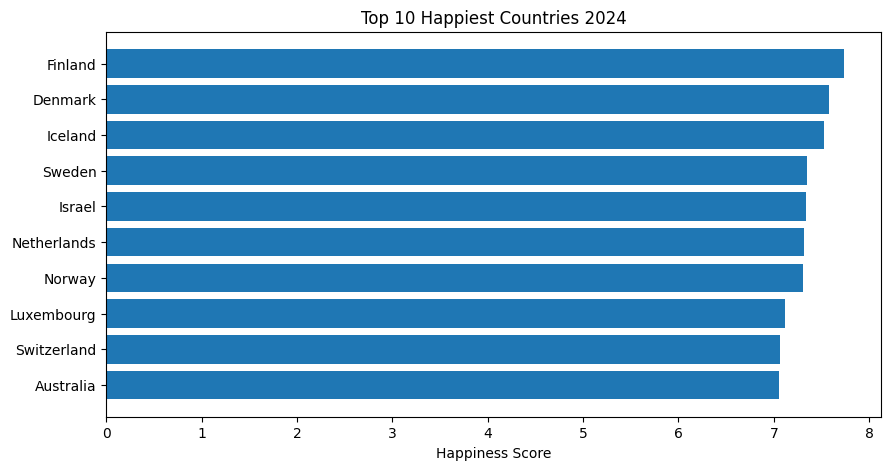

In [41]:


plt.figure(figsize=(10,5))

plt.barh(top_10["Country name"], top_10["Ladder score"])
plt.xlabel("Happiness Score")
plt.title("Top 10 Happiest Countries 2024")

plt.gca().invert_yaxis()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

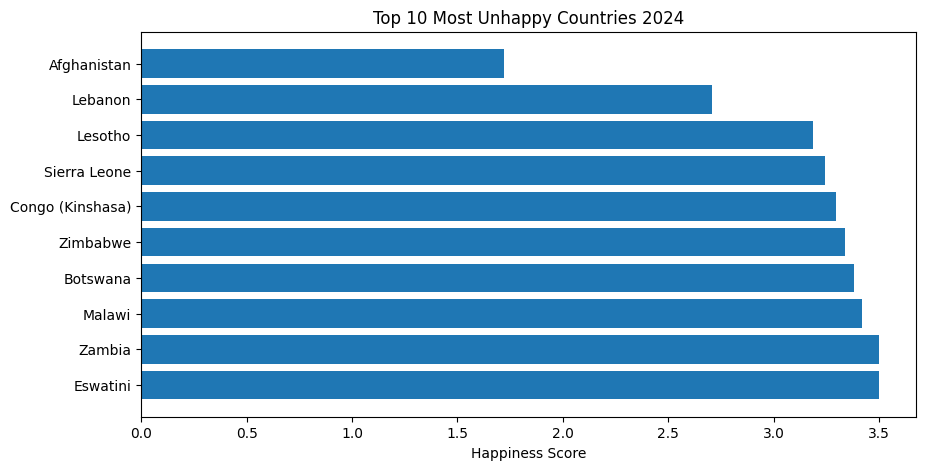

In [42]:


plt.figure(figsize=(10,5))

plt.barh(bottom_10["Country name"], bottom_10["Ladder score"])
plt.xlabel("Happiness Score")
plt.title("Top 10 Most Unhappy Countries 2024")

plt.gca().invert_yaxis()
plt.show

Histogram tablolarında gördüğümüz gibi en mutlu ve en mutsuz 10 ülkenin mutluluk puanlarını görselleştirdik. En mutlu ülke puanları 7 ve 8 arasında değişirken en mutsuz ülkelerin mutluluk puanı 1.5 ve 3.5 arasında değişiyor.

<function matplotlib.pyplot.show(close=None, block=None)>

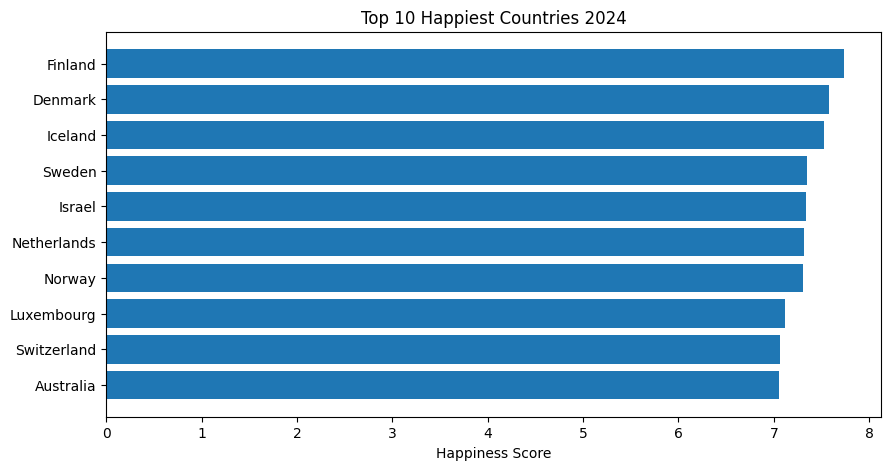

In [43]:


plt.figure(figsize=(10,5))

plt.barh(top_10["Country name"], top_10["Ladder score"])
plt.xlabel("Happiness Score")
plt.title("Top 10 Happiest Countries 2024")

plt.gca().invert_yaxis()
plt.show

In [44]:
factors = df_clean[[
    "Ladder score",
    "Explained by: Log GDP per capita",       
    "Explained by: Social support",              
    "Explained by: Healthy life expectancy",         
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",                     
    "Explained by: Perceptions of corruption",    
    "Dystopia + residual"            
    

    
]]

In [45]:
factors.describe()

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.530893,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.181247,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.631750,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.800500,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.426250,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [46]:
factors.mean()

Ladder score                                  5.530893
Explained by: Log GDP per capita              1.378807
Explained by: Social support                  1.134329
Explained by: Healthy life expectancy         0.520886
Explained by: Freedom to make life choices    0.620621
Explained by: Generosity                      0.146271
Explained by: Perceptions of corruption       0.154121
Dystopia + residual                           1.575914
dtype: float64

Analizimin yukarıdaki kısmında faktörlerimizi veri setimizdeki sütunlar olarak tanımladık ve ortalama,alabileceği min ve max gibi değerleri çıkarttık.

Şimdi scatter plotlarla mutluluk ve faktörler arasındaki ilişkiyi inceleyeceğiz

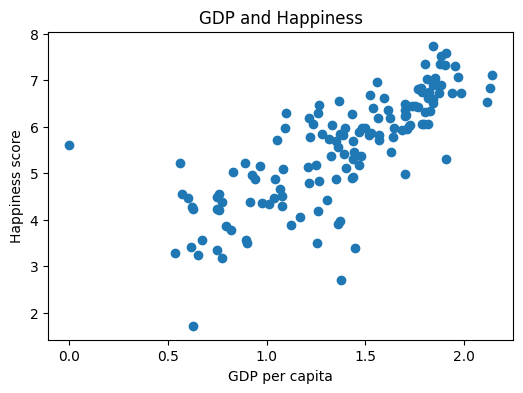

In [47]:
plt.figure(figsize=(6,4))
plt.scatter(
    factors["Explained by: Log GDP per capita"],
    factors["Ladder score"]

)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness score")
plt.title("GDP and Happiness")
plt.show()


Grafikte gördüğümüz gibi kişi başına düşen GDP ile mutluluk oranının doğru orantılı olduğunu görüyoruz.Bunun sonucunda kişi başına düşen GDP değerinin mutluluğa pozitif etkisi olduğu sonucuna ulaşırız.


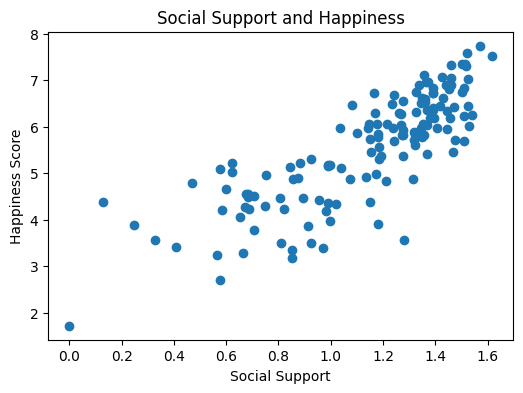

In [48]:
plt.figure(figsize=(6,4))
plt.scatter(
    factors["Explained by: Social support"],
    factors["Ladder score"]
)
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title("Social Support and Happiness")
plt.show()

Yukarıdaki grafite görüldüğü üzere sosyal destek ve mutluluk oranı arasında pozitif bir olduğunu göüyoruz.Bunun sonucunda sosyal destek mutluluk oranını olumlu etkiler sonucuna ulaşırız.

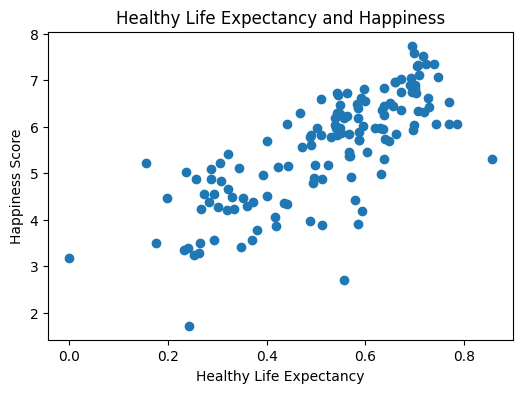

In [49]:
plt.figure(figsize=(6,4))
plt.scatter(
    factors["Explained by: Healthy life expectancy"],
    factors["Ladder score"]
)
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Happiness Score")
plt.title("Healthy Life Expectancy and Happiness")
plt.show()

Bu grafikte görüldüğü üzere sağlıklı yaşam beklentisi ve mutluluk oranı arasında doğru orantılı bir ilişki olduğunu görüyoruz.Bunun sonucunda sağlıklı yaşam beklentisi mutluluk oranını pozitif etkiliyor olduğu sonucuna varılır.

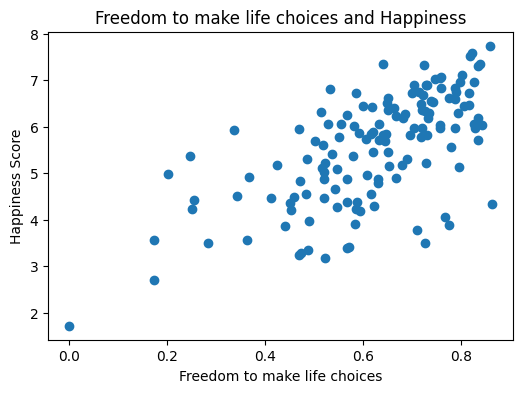

In [50]:
plt.figure(figsize=(6,4))
plt.scatter(
    factors["Explained by: Freedom to make life choices"],
    factors["Ladder score"]
)
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.title("Freedom to make life choices and Happiness")
plt.show()

Yukarıdaki grafikte görüldüğü üzere özgürlük ve mutluluk oranı arasında doğru orantılı bir ilişki olduğunu görüyoruz.Bunun sonucunda özgürlük oranının mutluluk oranını olumlu etkilediği sonucuna ulaşırız.

In [51]:
cols = [
    "Ladder score",
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption"
    
]

corr = df_clean[cols].corr()
corr

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Ladder score,1.000000,0.768504,0.813542,0.759659,0.644451,0.130038,0.451829
Explained by: Log GDP per capita,0.768504,1.000000,0.726843,0.830256,0.414886,-0.059405,0.444227
Explained by: Social support,0.813542,0.726843,1.000000,0.706924,0.484641,0.079466,0.250870
Explained by: Healthy life expectancy,0.759659,0.830256,0.706924,1.000000,0.401082,0.007148,0.399026
Explained by: Freedom to make life choices,0.644451,0.414886,0.484641,0.401082,1.000000,0.224323,0.344197
Explained by: Generosity,0.130038,-0.059405,0.079466,0.007148,0.224323,1.000000,0.172666
Explained by: Perceptions of corruption,0.451829,0.444227,0.250870,0.399026,0.344197,0.172666,1.000000


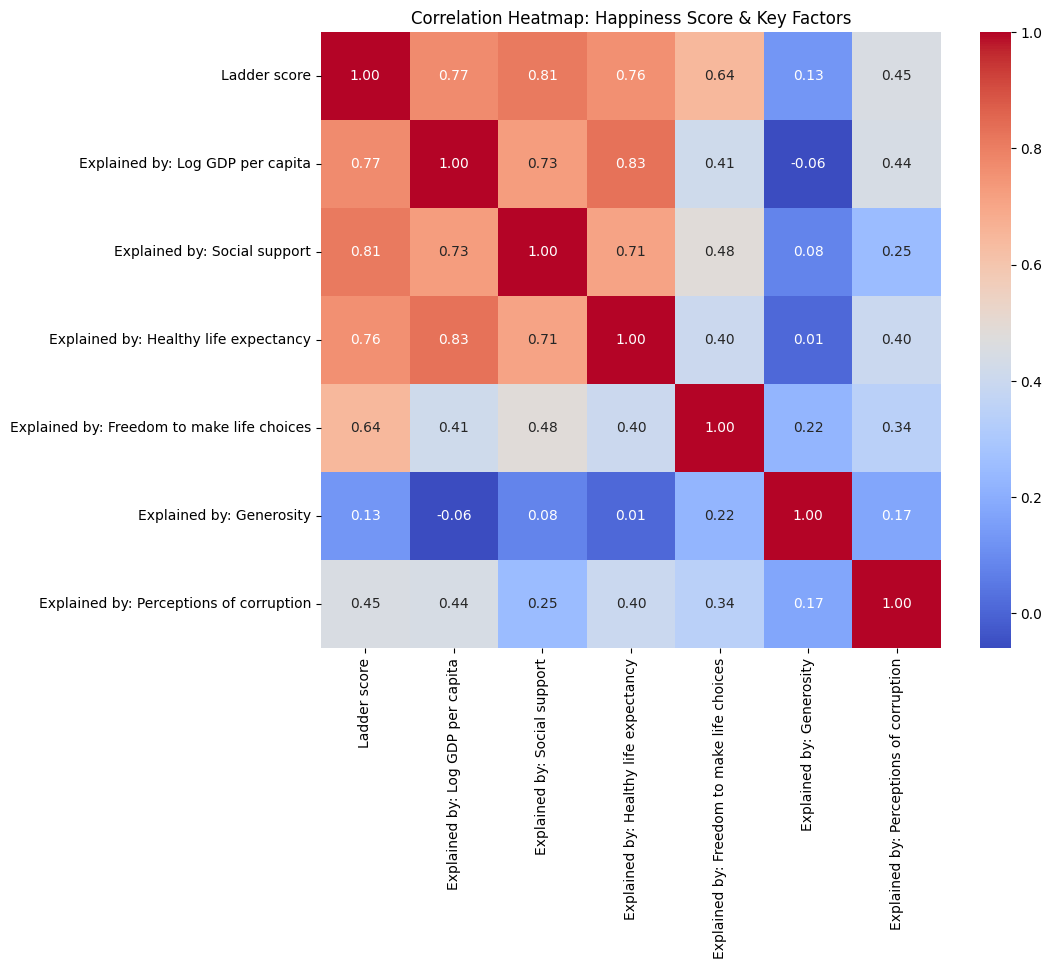

In [52]:

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Happiness Score & Key Factors")
plt.show()

Isı haritası analizimizin sonucunda sosyal destek ve sağlıklı yaşam beklentisinin mutluluk düzeyi üzerinde önemli etkisi olduğunu görüyoruz.Kişi başına düşen GDP faktörünün de etkisinin fark edilir olduğunu anlıyoruz.Özgürlük bunun öncesinde söylediğimiz faktörler kadar etkili olmasa da onun da mutluluk düzeyi üzerinde belirli bir etkisi olduğu da bir gerçek.Cömertlik için ise tek başına bir etkisi olduğunu söyleyemeyiz.Yolsuzluk algısı ise orta düzeyde etki gösteriyor yani yolsuzluk algısının az olduğu ülkelerde mutluluk oranının biraz daha yüksek olabileceği sonucuna varabiliriz.

In [53]:
top10 = df_clean.sort_values("Ladder score", ascending=False).head(10)
top10[["Country name", "Ladder score"]]

,Country name,Ladder score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525
3,Sweden,7.344
4,Israel,7.341
5,Netherlands,7.319
6,Norway,7.302
7,Luxembourg,7.122
8,Switzerland,7.060
9,Australia,7.057


Analizimin ilk kısmında da en mutlu ilk 10 ülkeyi sıralamıştık ve tablo halinde mutluluk düzeylerini görselleştirmiştik.En mutlu ülkelerin büyük çoğunluğu Batı ve Kuzey Avrupa'da bulunuyor.Bu sonuçtan sosyal refah sistemleri, kurumsal güven ve mutluluk düzeyi arasında güçlü bir ilişki olduğunu söyleyebiliriz.

In [54]:
bottom10 = df_clean.sort_values("Ladder score").head(10)
bottom10[["Country name", "Ladder score"]]

,Country name,Ladder score
142,Afghanistan,1.721
141,Lebanon,2.707
140,Lesotho,3.186
139,Sierra Leone,3.245
138,Congo (Kinshasa),3.295
137,Zimbabwe,3.341
136,Botswana,3.383
135,Malawi,3.421
133,Zambia,3.502
134,Eswatini,3.502


En mutsuz ülkelerinin mutluluk düzeyini garfikle görselleştirmiştik.Mutsuzluk oranı en yüksek ülkeler Afrika ve Güney Asya'da yoğunlaşmıştır.Bu bölgeler genellikle düşük gelir seviyeleri, sağlık hizmetlerine erişim zorluğu,ve zayıf sosyal destek sistemlerine sahip olduğunu söyleyebiliriz.

In [55]:
summary_table = pd.DataFrame({
    "Top 10 Mean": top10[cols].mean(),
    "Bottom 10 Mean": bottom10[cols].mean()
})

summary_table["Difference (Top - Bottom)"] = (
    summary_table["Top 10 Mean"] - summary_table["Bottom 10 Mean"]
)

In [56]:
summary_table = summary_table.round(3).sort_values(
    by="Difference (Top - Bottom)", ascending=False
)

summary_table

,Top 10 Mean,Bottom 10 Mean,Difference (Top - Bottom)
Ladder score,7.339,3.130,4.209
Explained by: Log GDP per capita,1.913,0.893,1.020
Explained by: Social support,1.494,0.662,0.832
Explained by: Healthy life expectancy,0.713,0.258,0.456
Explained by: Freedom to make life choices,0.786,0.427,0.358
Explained by: Perceptions of corruption,0.410,0.090,0.320
Explained by: Generosity,0.199,0.108,0.091


Yukarıdaki tabloda, en mutlu 10 ülke ile en mutsuz 10 ülkenin mutluluk skorlarını etkileyen faktörlerin ortalamaları ve bu ortalamalar arasındaki farklar gösterilmektedir.

Toplam mutluluk puanı (Ladder score) açısından iki grup arasında belirgin bir fark olduğu görülmektedir. Bu farkın en büyük kısmının kişi başına düşen gelir (Log GDP per capita) ve sosyal destek değişkenlerinden kaynaklandığı anlaşılmaktadır. Bu durum, ekonomik refah ve sosyal ilişkilerin mutluluk üzerinde güçlü bir etkiye sahip olduğunu göstermektedir.

Bunları sırasıyla sağlıklı yaşam beklentisi ve bireylerin yaşamlarıyla ilgili özgürce karar verebilme düzeyi takip etmektedir. Yolsuzluk algısının etkisi görece daha düşük olsa da mutluluk üzerinde hâlâ anlamlı bir katkı sağladığı söylenebilir. 

Buna karşılık, cömertlik değişkeninin iki grup arasındaki farkının oldukça düşük olması, bu faktörün mutluluk skorunu doğrudan belirleyen temel unsurlardan biri olmadığını düşündürmektedir.

Analizin genel sonuçları incelendiğinde mutlu bir ülkenin yalnızca ekonomik açıdan güçlü olmasıyla anlaşılayamayacağı açıkça görülmektedir. Yüksek mutluluk puanına sahip ülkelerde kişi başına düşen milli gelirin önemli bir rol oynadığı görülse de bu etki tek başına yeterli değildir. Sosyal destek imkanlarının güçlü olması bireylerin kendilerini güvende hissetmeleri  mutluluk düzeyini anlamlı şekilde artırmaktadır.

Bunun yanı sıra sağlıklı yaşam beklentisinin yüksek olması ve bireylerin yaşamlarıyla ilgili özgürce karar verebildiklerini hissetmeleri mutluluk üzerinde ekonomik etkilerle birlikte etkili olan faktörler arasında yer almaktadır. Analiz sonuçları ekonomik gücün mutluluğu destekleyen önemli bir unsur olduğunu ancak sosyal bağlar, özgürlük algısı ve yaşam kalitesi gibi insani faktörlerle beraber değilken yeterli olmadığını göstermektedir. Bu durum sürdürülebilir mutluluğun yalnızca maddi refah değil dengeli bir toplumsal yapı ile mümkün olabileceğini ortaya koymaktadır.

Analiz sürecinde dikkat çeken ve beklenenden farklı olan bir sonuç sosyal desteğin mutluluk üzerinde en yüksek etkiye sahip faktörlerden biri olmasıdır. Bunun sonucunda toplumun yaşamlarıyla ilgili özgürce karar verebilme düzeyinin mutluluğa olan etkisinin daha düşük olduğu görülmüştür. Bu durum bireysel özgürlüktense güçlü sosyal ilişkilerin ve toplumsal dayanışmanın mutluluk açısından daha etkileyici olabileceğini göstermektedir.